<a href="https://colab.research.google.com/github/agustinsilva447/Fisica-de-los-Semiconductores/blob/main/4_2d_schrodinger_eq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from matplotlib.animation import PillowWriter
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
from mpl_toolkits.mplot3d import Axes3D
from scipy import sparse

In [2]:
N = 150
X, Y = np.meshgrid(np.linspace(0,1,N, dtype=float),
                   np.linspace(0,1,N, dtype=float))

In [3]:
def get_potential_1(x,y):
    return 0*x
def get_potential_2(x, y):
    return np.exp(-(x-0.3)**2/(2*0.1**2))*np.exp(-(y-0.3)**2/(2*0.1**2))
V = get_potential_2(X,Y)

In [4]:
diag  = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)
U = sparse.diags(V.reshape(N**2), (0))
H = T+U

In [5]:
eigenvalues, eigenvectors = eigsh(H, k=10, which='SM')

In [6]:
def get_e(n):
    return eigenvectors.T[n].reshape((N,N))

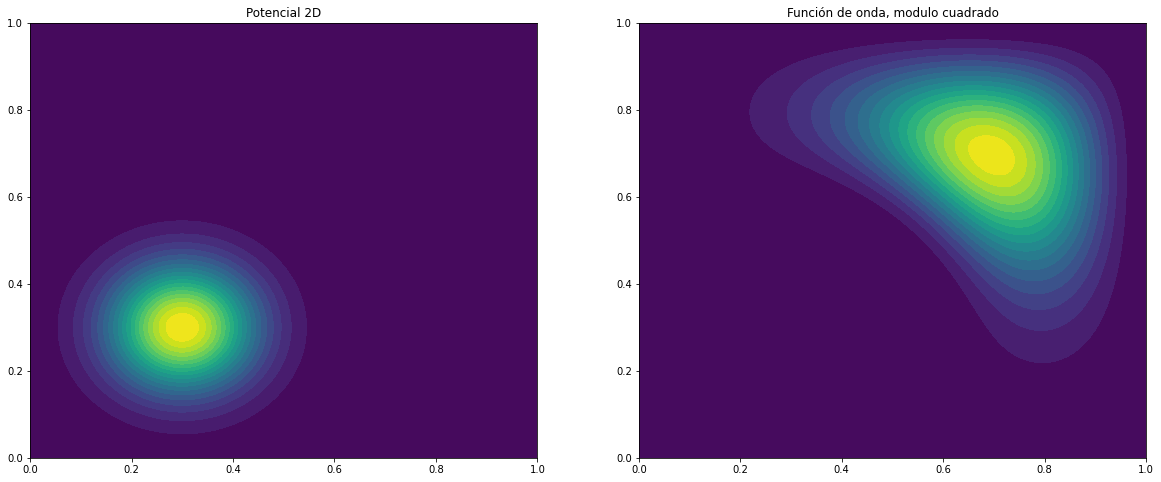

In [7]:
fig0, axs = plt.subplots(1,2,figsize=(20,8))
axs[0].set_title("Potencial 2D")
axs[0].contourf(X, Y, V, 20)
axs[1].set_title("Función de onda, modulo cuadrado")
axs[1].contourf(X, Y, get_e(0)**2, 20)
plt.show()

In [8]:
"""my_cmap = plt.get_cmap('cool')

def init():
    # Plot the surface.
    ax.plot_surface(X, Y, get_e(3)**2, cmap=my_cmap, linewidth=0, antialiased=False)
    ax.set_xlabel('$x/a$')
    ax.set_ylabel('$y/a$')
    ax.set_zlabel('$\propto|\psi|^2$')
    return fig,

def animate(i):
    ax.view_init(elev=10, azim=4*i)
    return fig,

fig = plt.figure()
ax = Axes3D(fig)
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50)
ani.save('rotate_azimuth_angle_3d_surf.gif',writer='pillow',fps=20)"""

"my_cmap = plt.get_cmap('cool')\n\ndef init():\n    # Plot the surface.\n    ax.plot_surface(X, Y, get_e(3)**2, cmap=my_cmap, linewidth=0, antialiased=False)\n    ax.set_xlabel('$x/a$')\n    ax.set_ylabel('$y/a$')\n    ax.set_zlabel('$\\propto|\\psi|^2$')\n    return fig,\n\ndef animate(i):\n    ax.view_init(elev=10, azim=4*i)\n    return fig,\n\nfig = plt.figure()\nax = Axes3D(fig)\nani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50)\nani.save('rotate_azimuth_angle_3d_surf.gif',writer='pillow',fps=20)"

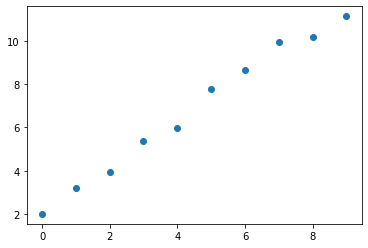

In [9]:
alpha = eigenvalues[0]/2
E_div_alpha = eigenvalues/alpha
_ = np.arange(0, len(eigenvalues), 1)
plt.scatter(_, E_div_alpha)